## Supplementary Figure 2: Sequences are preserved under inhibition

In [1]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as cPickle
import os.path as path
import os
from scipy import interpolate
from scipy.optimize import curve_fit

In [2]:
from submanifolds.ringnet import Plot
from submanifolds.utils import DataManager

## Analysis

### Preamble

In [3]:
stim = 'transient'
params_to_set = {'stim': [stim],
                 'type': ['projection'],
                 }

rescale_flag = [True, False]
shift_percent = np.arange(0,0.16,.01).round(3) #np.arange(0,0.11,.01).round(2)
perc_selectivity = np.arange(0,1,0.05).round(2)
seeds = np.arange(0,10,1) 

# tuple of static parameters for referencing
static_parameters = tuple(val[0] for val in params_to_set.values())

params_to_iterate = {'rescale': rescale_flag,
                     'p_inh': perc_selectivity,
                     'seed': seeds,
                     'shift_percent': shift_percent
                     }

In [4]:
# if new experiment is run, need to fill in name of folder here!
exp_data_dir = 'subspace_exp_2025-04-15_08:53:39'

In [5]:
manage = DataManager(exp_data_dir)

In [6]:
# load an example data set to get neuron population size (N) and number of time stamps (T)
# for this experiment N and T are the same for all simulations
parameter_setting = (True, 0, 0, 0) + static_parameters
net = manage.load_data(parameter_setting)

In [7]:
N = net.params.N
T = net.params.T
n_rescale = len(rescale_flag)
n_perc_sel = len(perc_selectivity)
n_shifts = len(shift_percent)
n_seeds = len(seeds)

In [8]:
colors = ['#586ba4', '#f68e5f', '#f5dd90', '#324376', '#f76c5e', 
          '#067d7a', '#77c1b3', '#f3c759', '#ed7364', '#b63653',
          '#6d2a2a', '#361a1a', '#191414', '#465865', '#928876',
          '#fc9234', '#fd6626', '#44867d', '#177070', '#404a50']

palette = ['#C47475', '#7F9CB0'] # ['#009E92', '#7F9CB0'] #['#1D7874', '#99A88C']

In [9]:
sns.set_style('ticks')  # seaborn style
ticksize = 16           # set tick font size
labelsize = 20          # set plot label sizes

In [10]:
# Figure storage
fig_dir_supplement = manage.root + 'figures/supplementary_figures/'
if not os.path.isdir(fig_dir_supplement):
    os.mkdir(fig_dir_supplement)
    print('Created ' + fig_dir_supplement)
else:
    print(fig_dir_supplement + ' already exists')

/home/andrew/Documents/projects/submanifolds/subspace_projections_with_selective_inhibition/rate_network/figures/supplementary_figures/ already exists


In [11]:
# figure storage
fig_dir = manage.root + 'figures/supplementary_figure_2/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
    print('Created ' + fig_dir)
else:
    print('Directory already exists')
    
save_figs_flag = 1

Directory already exists


### Load eigendecomposition data
Returns data with following shapes (see next cell):

In [12]:
#evals_W = defaultdict(dict) 
#evals_PW = defaultdict(dict) 
#evals_Wr = defaultdict(dict) 

#val_W_max = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_PW_max = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_Wr_max = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))

#val_W_argmax = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds), dtype=int)
#val_PW_argmax = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds), dtype=int)
#val_Wr_argmax = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds), dtype=int)

#val_W_max_real = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_PW_max_real = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_Wr_max_real = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))

#val_W_max_imag = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_PW_max_imag = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_Wr_max_imag = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))

#vec_W_max = 1j * np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds, N))
#vec_PW_max = 1j * np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds, N))
#vec_Wr_max = 1j * np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds, N))

In [13]:
eigendecomposition_data = manage.load_eigendecomposition_data()

for key in eigendecomposition_data.keys():
        exec(key + ' = eigendecomposition_data[key]')
        print('Extracted ' + key)

Extracted evals_W
Extracted evals_PW
Extracted evals_Wr
Extracted val_W_max
Extracted val_PW_max
Extracted val_Wr_max
Extracted val_W_argmax
Extracted val_PW_argmax
Extracted val_Wr_argmax
Extracted val_W_max_real
Extracted val_PW_max_real
Extracted val_Wr_max_real
Extracted val_W_max_imag
Extracted val_PW_max_imag
Extracted val_Wr_max_imag
Extracted vec_W_max
Extracted vec_PW_max
Extracted vec_Wr_max


# Supplementary Figure 2

In [14]:
# scaling
rescale_val = True
rescale_ind = rescale_flag.index(rescale_val) # 0 for rescaled, 1 for not rescaled weights

# not rescaled
no_rescale_val = False
no_rescale_ind = rescale_flag.index(no_rescale_val)

# percent selective inhibition
perc_val = .6
perc_ind = np.where(perc_selectivity==perc_val)[0][0]

# no selective inhibition
no_perc_val = 0
no_perc_ind = np.where(perc_selectivity==no_perc_val)[0][0]

# shift
shift_val = 0.1
shift_ind = np.where(shift_percent==shift_val)[0][0]

# no shift
no_shift_val = 0
no_shift_ind = np.where(shift_percent==no_shift_val)[0][0]

# seed
seed_val = 0
seed_ind = np.where(seeds==seed_val)[0][0]

## Eigenvalues

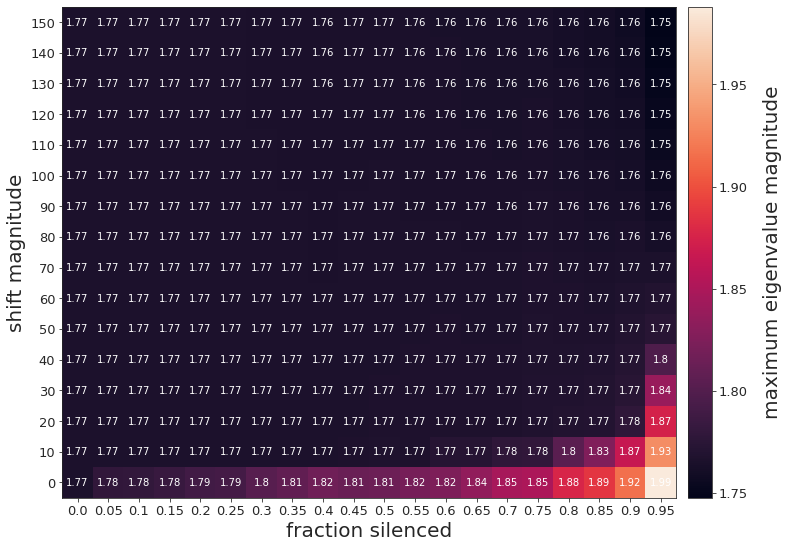

In [15]:
fname='maximum_eigenvalue.pdf'

fig, ax = plt.subplots(figsize=(11,11))
im = ax.imshow(val_PW_max[rescale_ind,:,:,:].mean(axis=2).T, origin='lower')
#plt.colorbar()

plt.xlabel('fraction silenced', fontsize=labelsize)
plt.ylabel('shift magnitude', fontsize=labelsize)
#plt.xticks(np.arange(0,1, 0.1))

plt.xticks(np.arange(0,len(perc_selectivity)), perc_selectivity, fontsize=13)
plt.yticks(np.arange(0,len(shift_percent)), (1000*shift_percent).astype(int), fontsize=13)

cax = fig.add_axes([ax.get_position().x1+0.015,ax.get_position().y0,0.03,ax.get_position().height])
cb = plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)

cb.ax.tick_params(labelsize=13)
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel('maximum eigenvalue magnitude', fontsize=20)

for (j,i), label in np.ndenumerate(val_PW_max[rescale_ind,:,:,:].mean(axis=2).T):
    ax.text(i,j, label.round(2), ha='center',va='center',color='white')

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

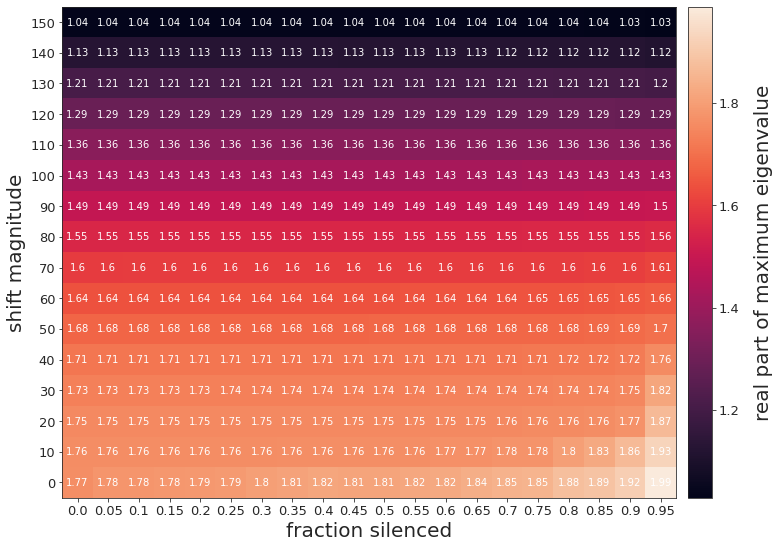

In [16]:
fname='maximum_real_part_of_eigenvalue.pdf'

fig, ax = plt.subplots(figsize=(11,11))
im = ax.imshow(val_PW_max_real[rescale_ind,:,:,:].mean(axis=2).T, origin='lower')
#plt.colorbar()

plt.xlabel('fraction silenced', fontsize=labelsize)
plt.ylabel('shift magnitude', fontsize=labelsize)
#plt.xticks(np.arange(0,1, 0.1))

plt.xticks(np.arange(0,len(perc_selectivity)), perc_selectivity, fontsize=13)
plt.yticks(np.arange(0,len(shift_percent)), (1000*shift_percent).astype(int), fontsize=13)

cax = fig.add_axes([ax.get_position().x1+0.015,ax.get_position().y0,0.03,ax.get_position().height])
cb = plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)

cb.ax.tick_params(labelsize=13)
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel('real part of maximum eigenvalue', fontsize=20)

for (j,i), label in np.ndenumerate(val_PW_max_real[rescale_ind,:,:,:].mean(axis=2).T):
    ax.text(i,j, label.round(2), ha='center',va='center',color='white')

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

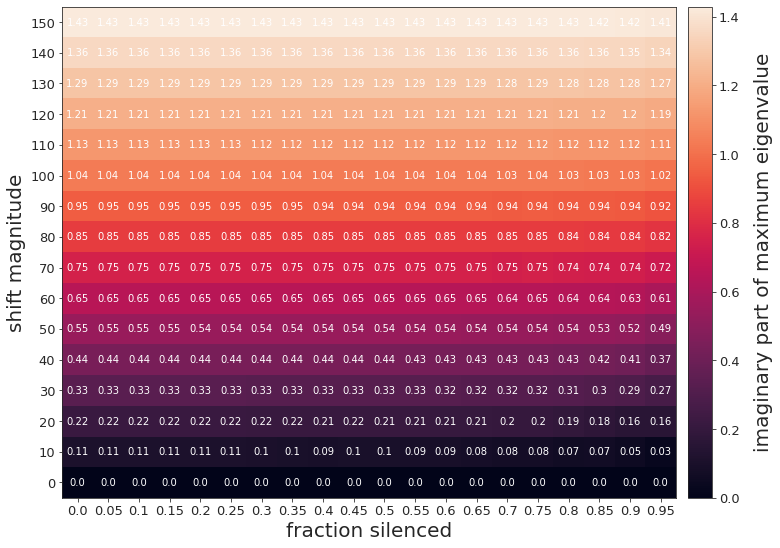

In [17]:
fname='maximum_imag_part_of_eigenvalue.pdf'

fig, ax = plt.subplots(figsize=(11,11))
im = ax.imshow(val_PW_max_imag[rescale_ind,:,:,:].mean(axis=2).T, origin='lower')
#plt.colorbar()

plt.xlabel('fraction silenced', fontsize=labelsize)
plt.ylabel('shift magnitude', fontsize=labelsize)
#plt.xticks(np.arange(0,1, 0.1))

plt.xticks(np.arange(0,len(perc_selectivity)), perc_selectivity, fontsize=13)
plt.yticks(np.arange(0,len(shift_percent)), (1000*shift_percent).astype(int), fontsize=13)

cax = fig.add_axes([ax.get_position().x1+0.015,ax.get_position().y0,0.03,ax.get_position().height])
cb = plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)

cb.ax.tick_params(labelsize=13)
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel('imaginary part of maximum eigenvalue', fontsize=20)

for (j,i), label in np.ndenumerate(val_PW_max_imag[rescale_ind,:,:,:].mean(axis=2).T):
    ax.text(i,j, label.round(2), ha='center',va='center',color='white')

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

## Eigenvectors

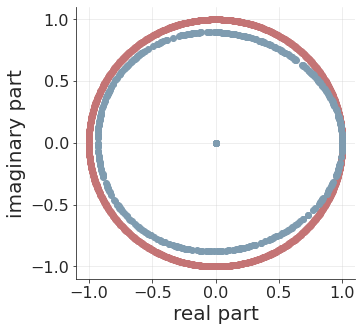

In [18]:
# normalize
vec_W_norm = vec_W_max[rescale_ind, perc_ind, shift_ind, seed_ind,:] / np.abs(vec_W_max[rescale_ind, perc_ind, shift_ind, seed_ind,:]).max()
vec_PW_norm = vec_PW_max[rescale_ind, perc_ind, shift_ind, seed_ind,:] / np.abs(vec_PW_max[rescale_ind, perc_ind, shift_ind, seed_ind,:]).max()
vec_Wr_norm = vec_Wr_max[rescale_ind, perc_ind, shift_ind, seed_ind,:] / np.abs(vec_Wr_max[rescale_ind, perc_ind, shift_ind, seed_ind,:]).max()

fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(vec_W_norm.real, vec_W_norm.imag, color=palette[0])
plt.scatter(vec_PW_norm.real, vec_PW_norm.imag, color=palette[1])
#plt.scatter(vec_Wr_norm.real, vec_Wr_norm.imag)

plt.xlabel('real part', fontsize=labelsize)
plt.ylabel('imaginary part', fontsize=labelsize)
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.4)

### Quantifying the deformation of the principal eigenvector

In [19]:
def compute_radius(vec_PW_norm):
    x = vec_PW_norm[vec_PW_norm!=0].real
    y = vec_PW_norm[vec_PW_norm!=0].imag

    gz = y >=0
    y_p = y[gz]
    x_p = x[gz]
    f_p = interpolate.interp1d(x_p, y_p)

    gz = y <=0
    y_n = y[gz]
    x_n = x[gz]
    f_n = interpolate.interp1d(x_n, y_n)

    real_radius = (np.abs(np.mean([np.max(x_p), np.max(x_n)])) + np.abs(np.mean([np.min(x_p), np.min(x_n)]))) / 2
    imag_radius = (np.abs(f_p(0)) + np.abs(f_n(0))) / 2
    
    return real_radius, imag_radius

In [20]:
min_radius_PW = np.zeros((n_perc_sel, n_shifts, n_seeds))
real_radius_PW = np.zeros((n_perc_sel, n_shifts, n_seeds))
imag_radius_PW = np.zeros((n_perc_sel, n_shifts, n_seeds))

# compute difference between principle eigenvector of W and PW
for k, p in enumerate(perc_selectivity):
    for i, s in enumerate(shift_percent):
        for j, seed in enumerate(seeds):

            vec_W_norm = vec_W_max[rescale_ind,k,i,j,:] / np.abs(vec_W_max[rescale_ind,k,i,j,:]).max()
            vec_PW_norm = vec_PW_max[rescale_ind,k,i,j,:] / np.abs(vec_PW_max[rescale_ind,k,i,j,:]).max()
            vec_Wr_norm = vec_Wr_max[rescale_ind,k,i,j,:] / np.abs(vec_Wr_max[rescale_ind,k,i,j,:]).max()

            min_radius_PW[k,i,j] = np.min(np.abs(vec_PW_norm[vec_PW_norm!=0]))

            real_radius_PW[k,i,j], imag_radius_PW[k,i,j] = compute_radius(vec_PW_norm)

In [21]:
min_radius_PW_sel = min_radius_PW[:,shift_ind,:]
real_radius_PW_sel = real_radius_PW[:,shift_ind,:]
imag_radius_PW_sel = imag_radius_PW[:,shift_ind,:]

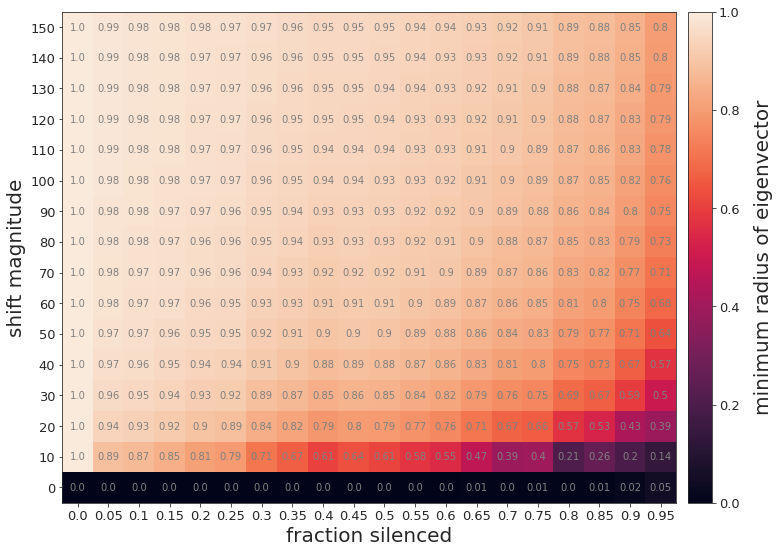

In [22]:
fname='minimum_radius_of_eigenvector.pdf'

fig, ax = plt.subplots(figsize=(11,11))
im = ax.imshow(min_radius_PW.mean(axis=2).T, origin='lower')
#plt.colorbar()

plt.xlabel('fraction silenced', fontsize=labelsize)
plt.ylabel('shift magnitude', fontsize=labelsize)
#plt.xticks(np.arange(0,1, 0.1))

plt.xticks(np.arange(0,len(perc_selectivity)), perc_selectivity, fontsize=13)
plt.yticks(np.arange(0,len(shift_percent)), (1000*shift_percent).astype(int), fontsize=13)

cax = fig.add_axes([ax.get_position().x1+0.015,ax.get_position().y0,0.03,ax.get_position().height])
cb = plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)

cb.ax.tick_params(labelsize=13)
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel('minimum radius of eigenvector', fontsize=20)

for (j,i), label in np.ndenumerate(min_radius_PW.mean(axis=2).T):
    ax.text(i,j, label.round(2), ha='center',va='center',color='grey')

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()


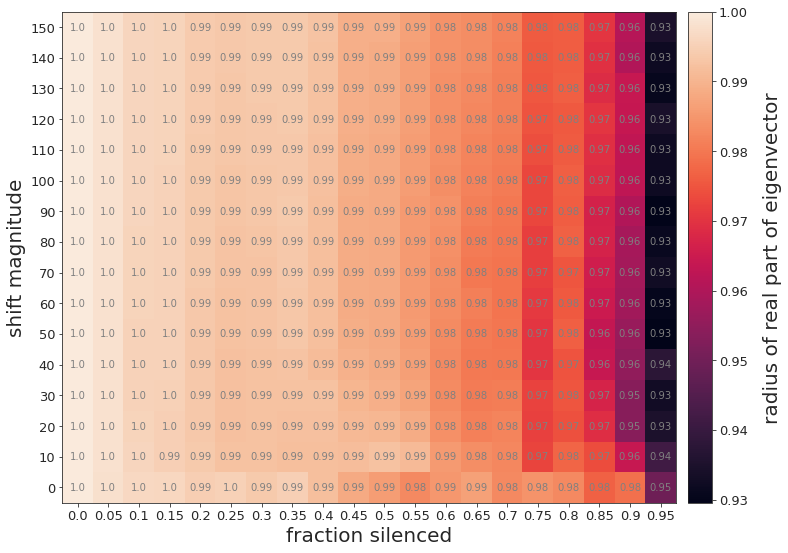

In [23]:
fname='real_radius_of_eigenvector.pdf'

fig, ax = plt.subplots(figsize=(11,11))
im = ax.imshow(real_radius_PW.mean(axis=2).T, origin='lower')#, vmin=0, vmax=1)
#plt.colorbar()

plt.xlabel('fraction silenced', fontsize=labelsize)
plt.ylabel('shift magnitude', fontsize=labelsize)
#plt.xticks(np.arange(0,1, 0.1))

plt.xticks(np.arange(0,len(perc_selectivity)), perc_selectivity, fontsize=13)
plt.yticks(np.arange(0,len(shift_percent)), (1000*shift_percent).astype(int), fontsize=13)

cax = fig.add_axes([ax.get_position().x1+0.015,ax.get_position().y0,0.03,ax.get_position().height])
cb = plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)

cb.ax.tick_params(labelsize=13)
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel('radius of real part of eigenvector', fontsize=20)

for (j,i), label in np.ndenumerate(real_radius_PW.mean(axis=2).T):
    ax.text(i,j, label.round(2), ha='center',va='center',color='grey')

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()


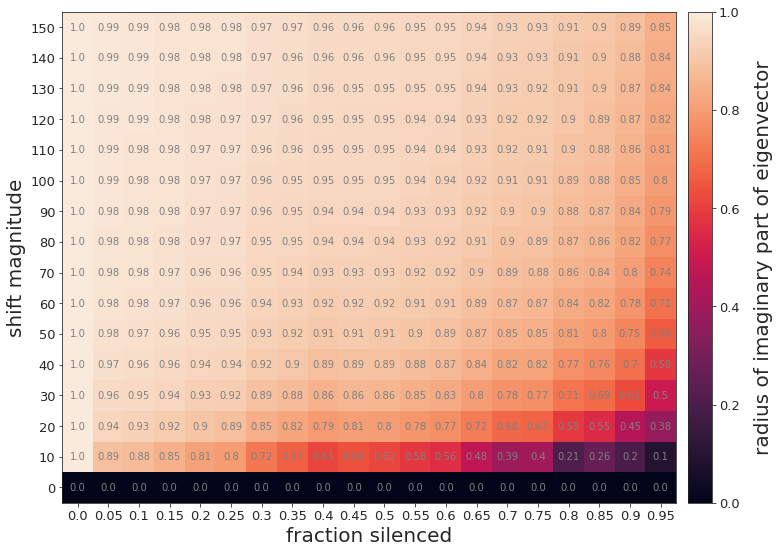

In [24]:
fname='imaginary_radius_of_eigenvector.pdf'

fig, ax = plt.subplots(figsize=(11,11))
im = ax.imshow(imag_radius_PW.mean(axis=2).T, origin='lower')
#plt.colorbar()

plt.xlabel('fraction silenced', fontsize=labelsize)
plt.ylabel('shift magnitude', fontsize=labelsize)
#plt.xticks(np.arange(0,1, 0.1))

plt.xticks(np.arange(0,len(perc_selectivity)), perc_selectivity, fontsize=13)
plt.yticks(np.arange(0,len(shift_percent)), (1000*shift_percent).astype(int), fontsize=13)

cax = fig.add_axes([ax.get_position().x1+0.015,ax.get_position().y0,0.03,ax.get_position().height])
cb = plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)

cb.ax.tick_params(labelsize=13)
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel('radius of imaginary part of eigenvector', fontsize=20)

for (j,i), label in np.ndenumerate(imag_radius_PW.mean(axis=2).T):
    ax.text(i,j, label.round(2), ha='center',va='center',color='grey')
    
if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()
